#Project Title: Predicting Customer Purchase Behavior on E-Commerce


## Project Objective: Predict whether a customer will make a purchase, and identify which features (e.g., age, gender, income, product category) influence purchasing behavior.

##Tools: Statistical Tests (Chi-Square & ANOVA), AI Techniques (Random Forest)

##Data Description
### The "E-commerce Customer Behavior and Purchase Dataset" is a synthetic dataset generated using the Faker Python library. It simulates a comprehensive e-commerce environment, capturing various aspects of customer behavior and purchase history within a digital marketplace. This dataset has been designed for data analysis and predictive modeling in the field of e-commerce. It is suitable for tasks such as customer churn prediction, market basket analysis, recommendation systems, and trend analysis.

## Data Processing

In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #convert categorical labels into numerical values
from sklearn.model_selection import train_test_split #used to split a dataset into training and testing subsets
from sklearn.ensemble import RandomForestClassifier #It creates multiple decision trees and aggregates their predictions.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #are essential for evaluating the performance of classification models

#load the dataset
df = pd.read_csv('ecommerce_customer_data.csv')
df.fillna(method='ffill', inplace=True)
df.head()

<ipython-input-8-d2a8dd043128>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [9]:

#encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Product Category'] = le.fit_transform(df['Product Category'])
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Customer Name'] = le.fit_transform(df['Customer Name'])
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,2,12,3,740,1,37,0.0,7490,37,1,0
1,46251,2022-03-05 12:56:35,3,468,4,2739,3,37,0.0,7490,37,1,0
2,46251,2022-05-23 18:18:01,3,288,2,3196,3,37,0.0,7490,37,1,0
3,46251,2020-11-12 13:13:29,1,196,1,3509,3,37,0.0,7490,37,1,0
4,13593,2020-11-27 17:55:11,3,449,1,3452,1,49,0.0,15548,49,0,1


#Exploratory Data Analysis (EDA)
1. Visualize purchase behavior using seaborn/matplotlib
2. Use chi-square test for categorical features (e.g., Gender, Product Category)

3. Use ANOVA for numerical features (e.g., Age, Income)

In [10]:
# Chi-square test
from scipy.stats import chi2_contingency # perform the Chi-Square test of independence on a contingency table
contingency = pd.crosstab(df['Gender'], df['Product Category'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.16362369173096045


In [11]:
#ANOVA test
from scipy.stats import f_oneway #used to perform a one-way ANOVA (Analysis of Variance) test

grouped = df.groupby('Product Category')['Age'].apply(list)
anova_result = f_oneway(*grouped)
print(f"ANOVA p-value for Age: {anova_result.pvalue}")


ANOVA p-value for Age: 0.4151646856356084


In [12]:



# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

#extract feature
df['PurchaseHour'] = df['Purchase Date'].dt.hour
df['PurchaseDayOfWeek'] = df['Purchase Date'].dt.dayofweek
df['PurchaseMonth'] = df['Purchase Date'].dt.month
df['IsWeekend'] = df['PurchaseDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original timestamp column
df.drop('Purchase Date', axis=1, inplace=True)

df.head()


,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,PurchaseHour,PurchaseDayOfWeek,PurchaseMonth,IsWeekend
0,46251,2,12,3,740,1,37,0.0,7490,37,1,0,9,1,9,0
1,46251,3,468,4,2739,3,37,0.0,7490,37,1,0,12,5,3,1
2,46251,3,288,2,3196,3,37,0.0,7490,37,1,0,18,0,5,0
3,46251,1,196,1,3509,3,37,0.0,7490,37,1,0,13,3,11,0
4,13593,3,449,1,3452,1,49,0.0,15548,49,0,1,17,4,11,0


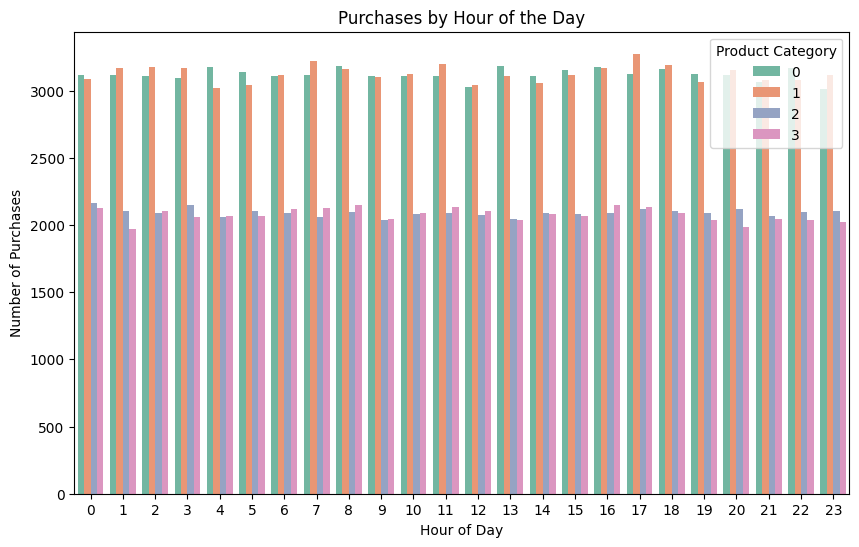

In [13]:
#Visualizations
#purchase by hour of the day

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PurchaseHour', hue='Product Category', palette='Set2')
plt.title('Purchases by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.show()

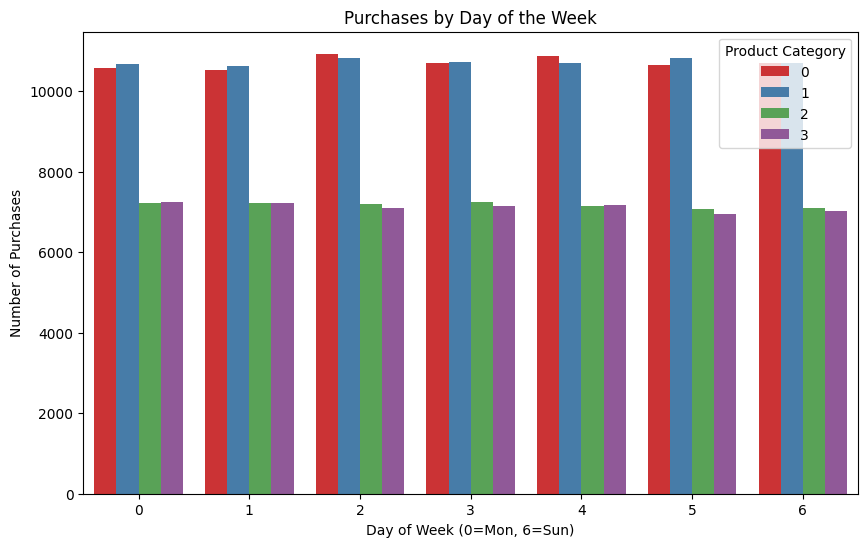

In [14]:
#Purchases by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PurchaseDayOfWeek', hue='Product Category', palette='Set1')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.show()

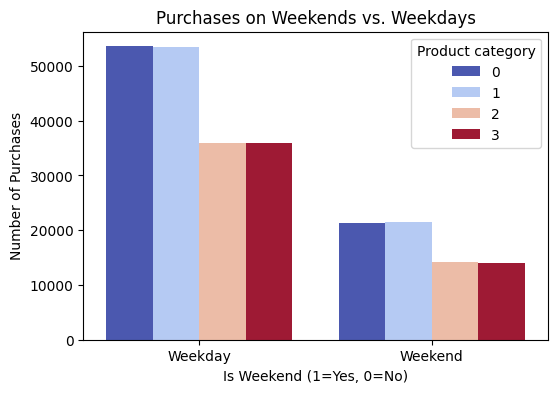

In [15]:
#Weekend vs. Weekday Purchases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='IsWeekend', hue='Product Category', palette='coolwarm')
plt.title('Purchases on Weekends vs. Weekdays')
plt.xlabel('Is Weekend (1=Yes, 0=No)')
plt.ylabel('Number of Purchases')
plt.legend(title='Product category')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

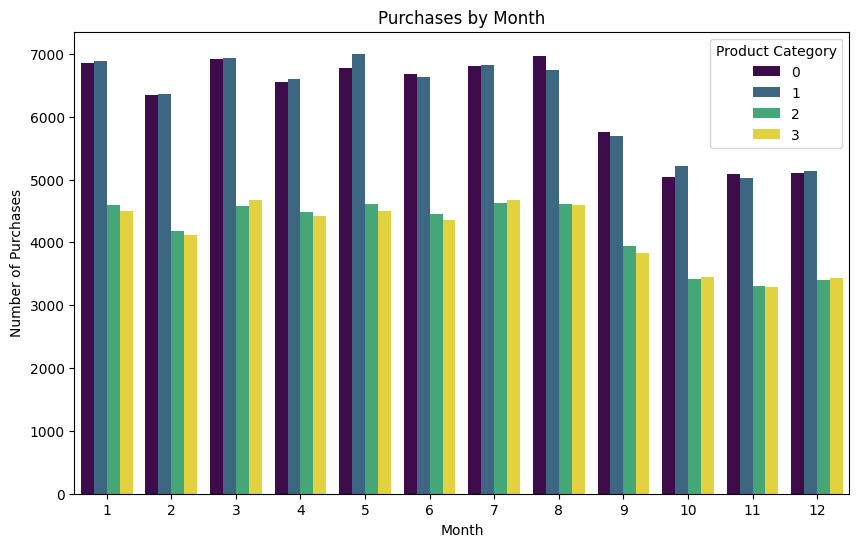

In [16]:
#Purchases by Month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PurchaseMonth', hue='Product Category', palette='viridis')
plt.title('Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.show()

#Model Building with AI (Machine Learning)
Model: Random Forest



In [20]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop("Product Category", axis=1)
y = df["Product Category"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.30      0.47      0.36     15028
           1       0.30      0.44      0.36     15101
           2       0.19      0.04      0.07      9960
           3       0.20      0.04      0.07      9911

    accuracy                           0.29     50000
   macro avg       0.25      0.25      0.21     50000
weighted avg       0.26      0.29      0.24     50000



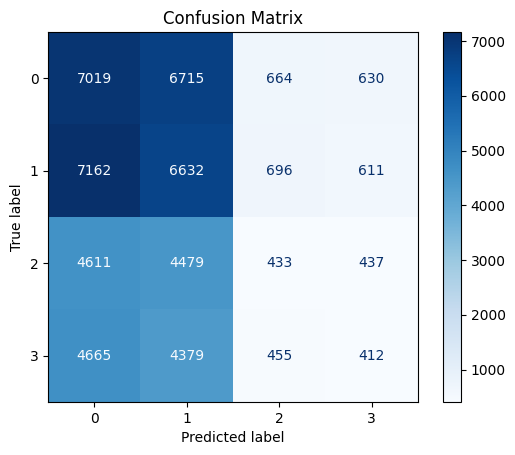

In [21]:
#Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


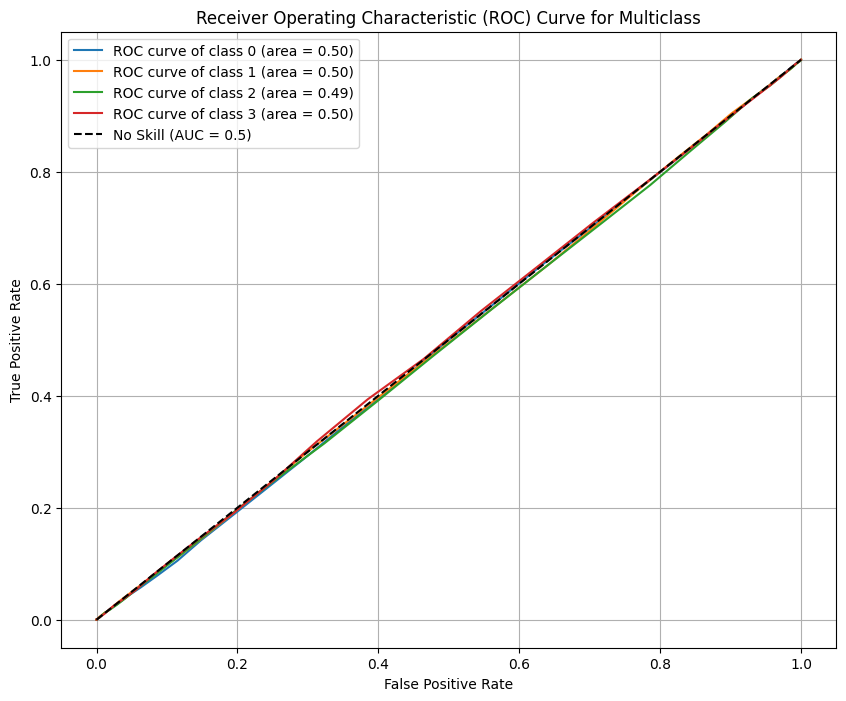

In [23]:
# ROC Curve Visualization
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize # used for binarizing labels in multiclass classification

# Predict probabilities for each class
y_prob = model.predict_proba(X_test)

# Binarize the true labels for multiclass ROC calculation
# This transforms the multiclass labels into a one-hot encoded format
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot the ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend()
plt.grid(True)
plt.show()

#Interpretation of Results

<ipython-input-24-cfa3f58d3122>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')


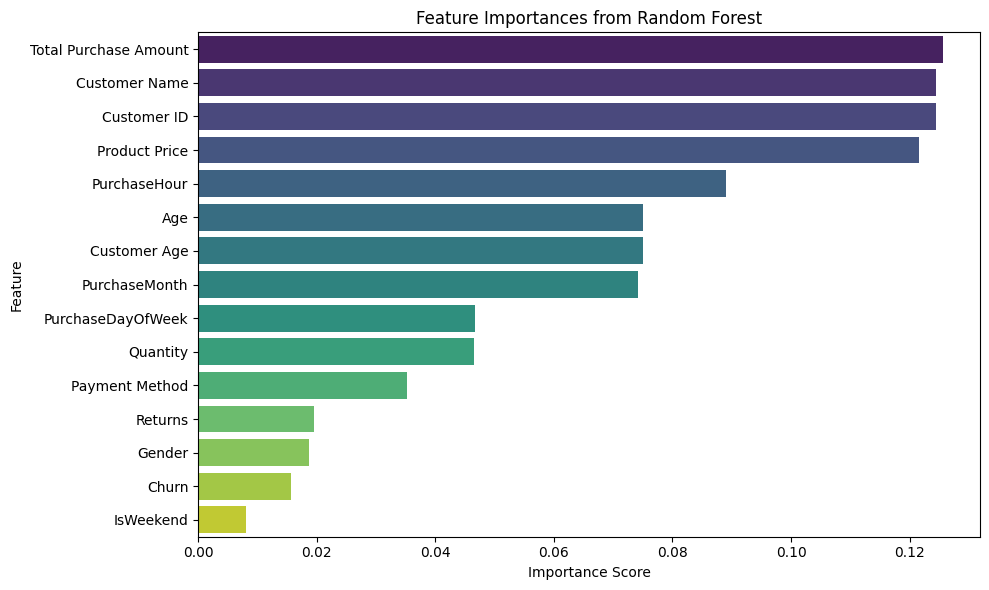

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy viewing
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<ipython-input-25-4593459c1a26>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_df, x='Importance', y='Feature', palette='coolwarm')


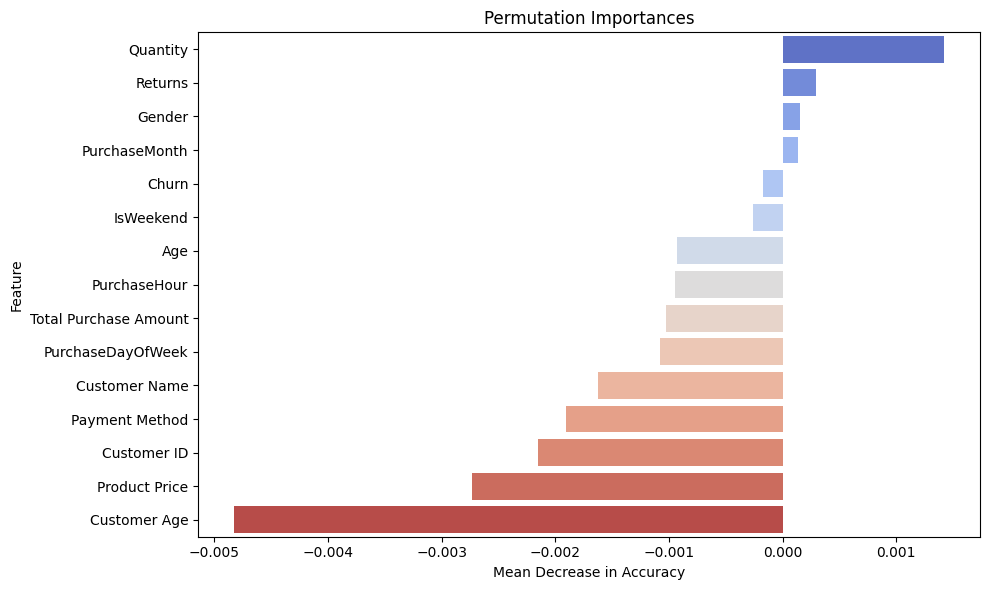

In [25]:
#Option 2
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort and visualize
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Permutation Importances')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
